# A - Kutuphanelerin Import Edilmesi

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/esigning-of-loan-based-on-financial-history/financial_data.csv


# B - Veriye Genel Bakış

In [2]:
df = pd.read_csv("/kaggle/input/esigning-of-loan-based-on-financial-history/financial_data.csv")

In [3]:
df.head()

,entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,...,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,3560428,61,weekly,0,3180,0,6,3,2,7,...,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,6934997,23,weekly,0,1540,6,0,0,7,1,...,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,5682812,40,bi-weekly,0,5230,0,6,1,2,7,...,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,5335819,33,semi-monthly,0,3590,0,5,2,2,8,...,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0


In [4]:
df.columns

Index(['entry_id', 'age', 'pay_schedule', 'home_owner', 'income',
       'months_employed', 'years_employed', 'current_address_year',
       'personal_account_m', 'personal_account_y', 'has_debt',
       'amount_requested', 'risk_score', 'risk_score_2', 'risk_score_3',
       'risk_score_4', 'risk_score_5', 'ext_quality_score',
       'ext_quality_score_2', 'inquiries_last_month', 'e_signed'],
      dtype='object')

In [5]:
df.describe()

,entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
count,1.790800e+04,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000
mean,5.596978e+06,43.015412,0.425173,3657.214653,1.186006,3.526860,3.584711,3.427183,3.503350,0.795399,950.446449,61086.302211,0.690878,0.878276,0.583155,0.718252,0.623112,0.622068,6.457226,0.538251
std,2.562473e+06,11.873107,0.494383,1504.890063,2.400897,2.259732,2.751937,2.216440,1.955568,0.403421,698.543683,15394.255020,0.090470,0.054563,0.125061,0.120697,0.139729,0.139898,3.673093,0.498549
min,1.111398e+06,18.000000,0.000000,905.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,350.000000,2100.000000,0.023258,0.451371,0.016724,0.153367,0.010184,0.006622,1.000000,0.000000
25%,3.378999e+06,34.000000,0.000000,2580.000000,0.000000,2.000000,2.000000,2.000000,2.000000,1.000000,600.000000,49350.000000,0.640993,0.850882,0.500208,0.633708,0.521735,0.519677,4.000000,0.000000
50%,5.608376e+06,42.000000,0.000000,3260.000000,0.000000,3.000000,3.000000,2.000000,3.000000,1.000000,700.000000,61200.000000,0.699561,0.881004,0.588208,0.725113,0.625944,0.622974,6.000000,1.000000
75%,7.805624e+06,51.000000,1.000000,4670.000000,1.000000,5.000000,5.000000,5.000000,4.000000,1.000000,1100.000000,72750.000000,0.752887,0.912608,0.672395,0.806681,0.729841,0.728940,8.000000,1.000000
max,9.999874e+06,96.000000,1.000000,9985.000000,11.000000,16.000000,12.000000,11.000000,15.000000,1.000000,10200.000000,99750.000000,0.999997,0.999024,0.978932,0.996260,0.970249,0.966953,30.000000,1.000000


In [6]:
df.nunique()

entry_id                17888
age                        72
pay_schedule                4
home_owner                  2
income                   2284
months_employed            12
years_employed             17
current_address_year       13
personal_account_m         12
personal_account_y         16
has_debt                    2
amount_requested           98
risk_score               1411
risk_score_2            17475
risk_score_3             3945
risk_score_4            17628
risk_score_5            17597
ext_quality_score       17463
ext_quality_score_2     17469
inquiries_last_month       30
e_signed                    2
dtype: int64

In [7]:
df.isna().sum()

entry_id                0
age                     0
pay_schedule            0
home_owner              0
income                  0
months_employed         0
years_employed          0
current_address_year    0
personal_account_m      0
personal_account_y      0
has_debt                0
amount_requested        0
risk_score              0
risk_score_2            0
risk_score_3            0
risk_score_4            0
risk_score_5            0
ext_quality_score       0
ext_quality_score_2     0
inquiries_last_month    0
e_signed                0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17908 entries, 0 to 17907
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   entry_id              17908 non-null  int64  
 1   age                   17908 non-null  int64  
 2   pay_schedule          17908 non-null  object 
 3   home_owner            17908 non-null  int64  
 4   income                17908 non-null  int64  
 5   months_employed       17908 non-null  int64  
 6   years_employed        17908 non-null  int64  
 7   current_address_year  17908 non-null  int64  
 8   personal_account_m    17908 non-null  int64  
 9   personal_account_y    17908 non-null  int64  
 10  has_debt              17908 non-null  int64  
 11  amount_requested      17908 non-null  int64  
 12  risk_score            17908 non-null  int64  
 13  risk_score_2          17908 non-null  float64
 14  risk_score_3          17908 non-null  float64
 15  risk_score_4       

# C - Veri Ön Işleme Part 1

In [9]:
df.pay_schedule.value_counts()

bi-weekly       10716
weekly           3696
semi-monthly     2004
monthly          1492
Name: pay_schedule, dtype: int64

In [10]:
df = pd.get_dummies(df, "pay_schedule")

# D - Veri Görselleştirme Part 1

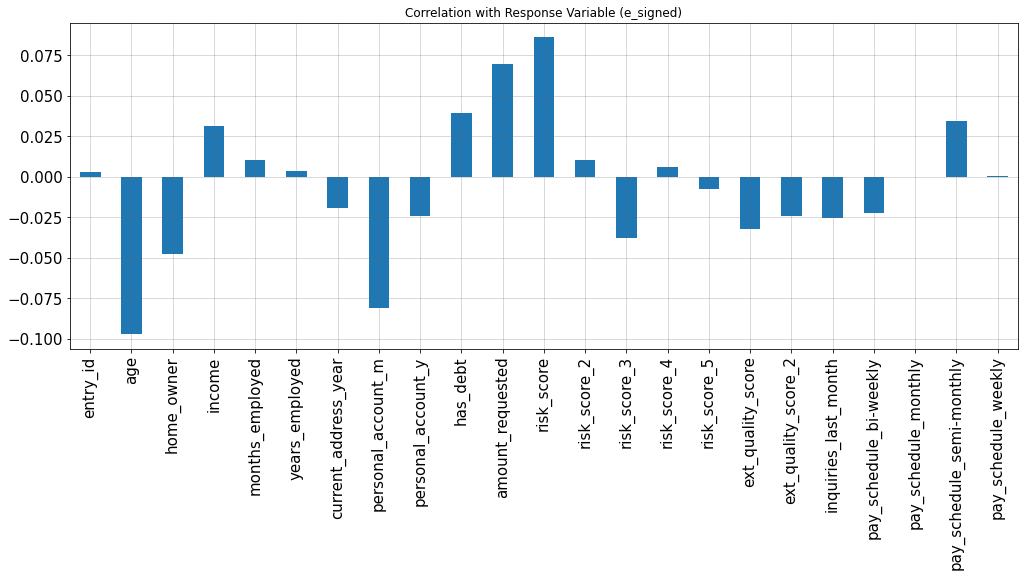

In [11]:
df.drop(columns = ["e_signed"], axis = 1).corrwith(df.e_signed).plot.bar(figsize=(17,6), 
                                                 title="Correlation with Response Variable (e_signed)",
                                                 fontsize=15,
                                                 rot=45,
                                                 )
plt.grid(b=True, which='major', color='#666666', linestyle='-', alpha=.3)
plt.xticks(rotation=90)
plt.show()

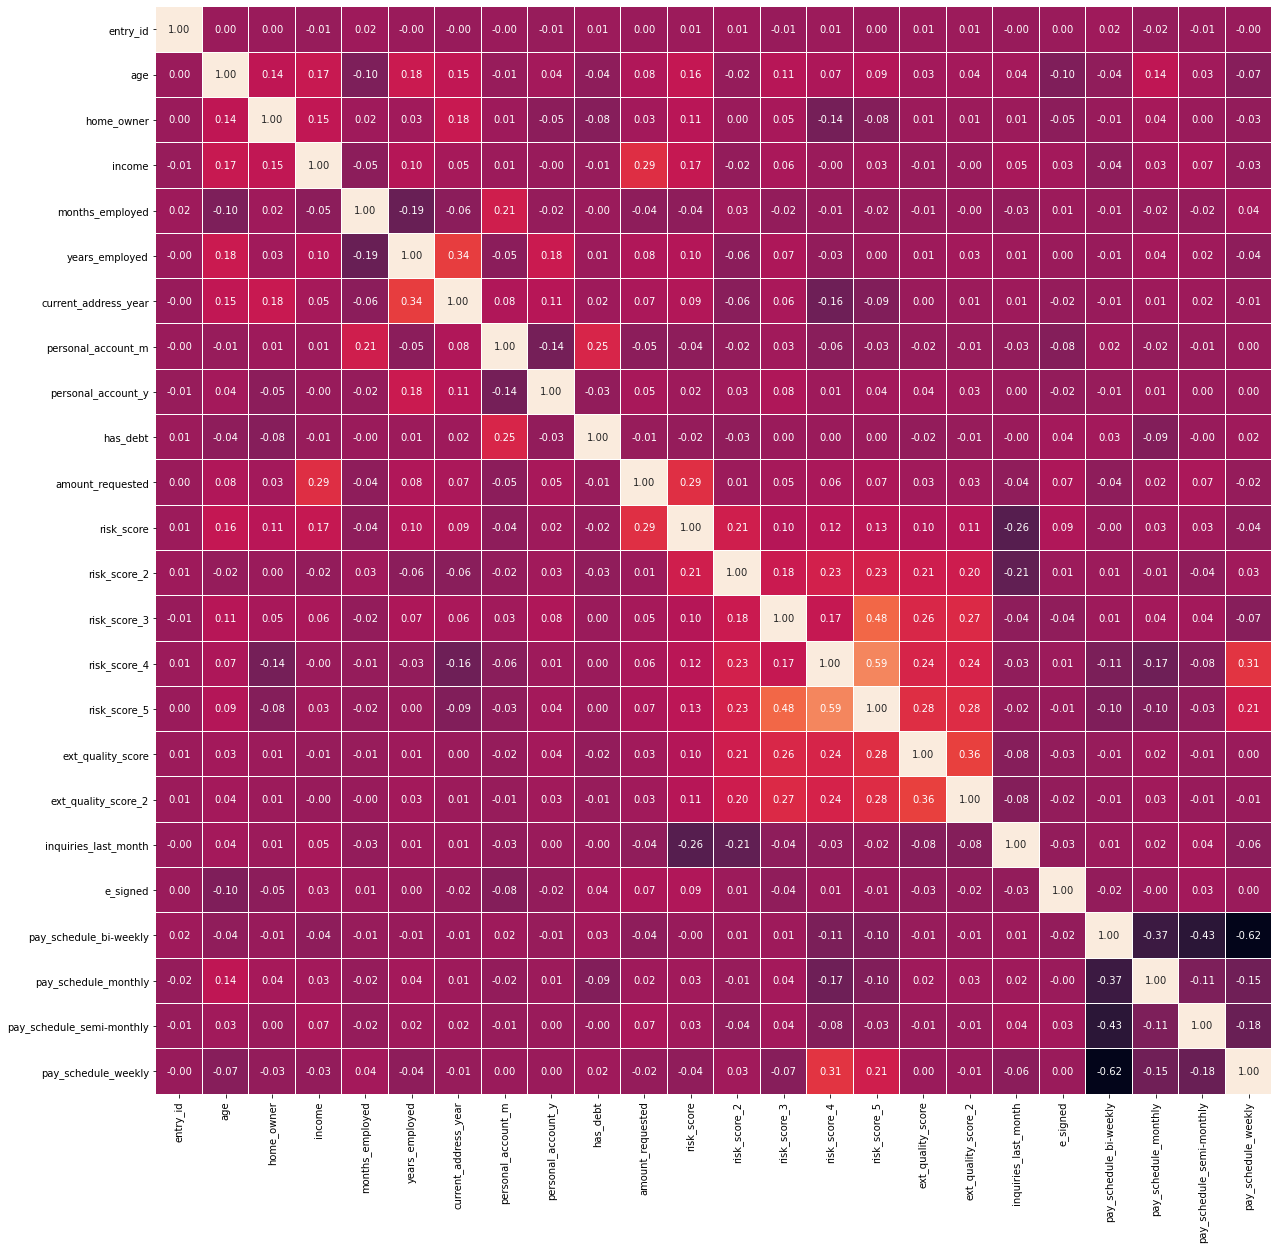

In [12]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot = True, fmt=".2f", linewidths=0.1, cbar=False)
plt.show()

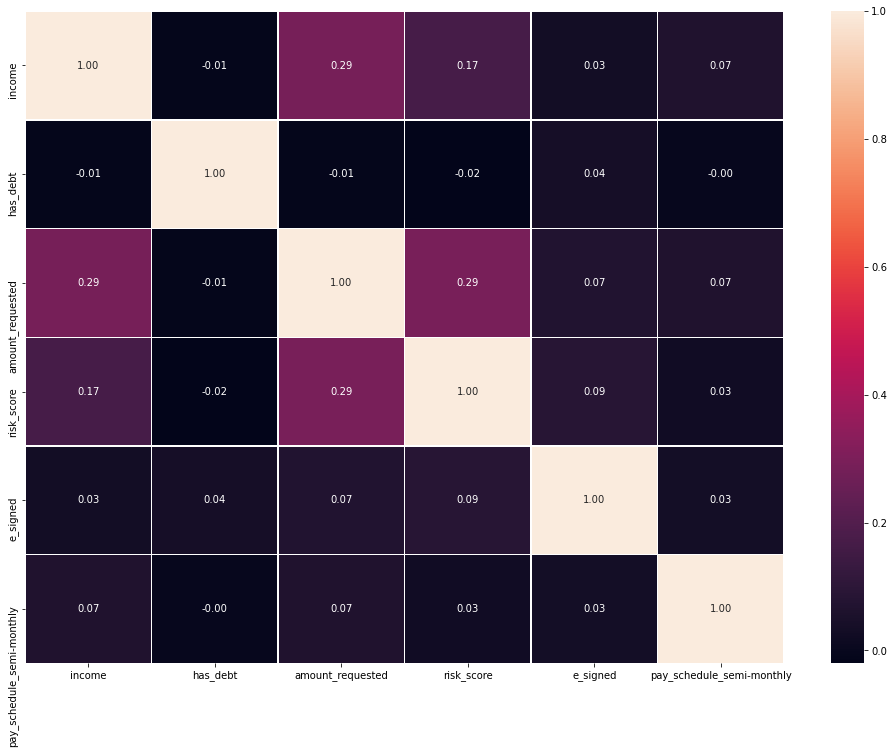

In [13]:
corr_matrix = df.corr()
filtre = np.abs(corr_matrix["e_signed"]>0.03)
corr_columns = corr_matrix.columns[filtre].tolist()
corr = df[corr_columns].corr()

plt.figure(figsize=(17,12))
sns.heatmap(corr, annot = True, linewidths=.4, linecolor="w",fmt=".2f")
plt.show()

In [14]:
np.abs(df.corr()["e_signed"]).sort_values(ascending=False)

e_signed                     1.000000
age                          0.096998
risk_score                   0.086098
personal_account_m           0.081195
amount_requested             0.069572
home_owner                   0.047409
has_debt                     0.039192
risk_score_3                 0.037483
pay_schedule_semi-monthly    0.034232
ext_quality_score            0.032129
income                       0.031377
inquiries_last_month         0.025165
ext_quality_score_2          0.024271
personal_account_y           0.024160
pay_schedule_bi-weekly       0.022369
current_address_year         0.018969
risk_score_2                 0.010473
months_employed              0.010128
risk_score_5                 0.007541
risk_score_4                 0.006147
years_employed               0.003748
entry_id                     0.002735
pay_schedule_weekly          0.000449
pay_schedule_monthly         0.000029
Name: e_signed, dtype: float64

In [15]:
df.columns

Index(['entry_id', 'age', 'home_owner', 'income', 'months_employed',
       'years_employed', 'current_address_year', 'personal_account_m',
       'personal_account_y', 'has_debt', 'amount_requested', 'risk_score',
       'risk_score_2', 'risk_score_3', 'risk_score_4', 'risk_score_5',
       'ext_quality_score', 'ext_quality_score_2', 'inquiries_last_month',
       'e_signed', 'pay_schedule_bi-weekly', 'pay_schedule_monthly',
       'pay_schedule_semi-monthly', 'pay_schedule_weekly'],
      dtype='object')

# C - Veri Ön Işleme Part 2

In [16]:
df.drop(columns = ['pay_schedule_weekly', 'pay_schedule_monthly'], axis = 1, inplace = True)

# D Veri Görselleştirme Part 2

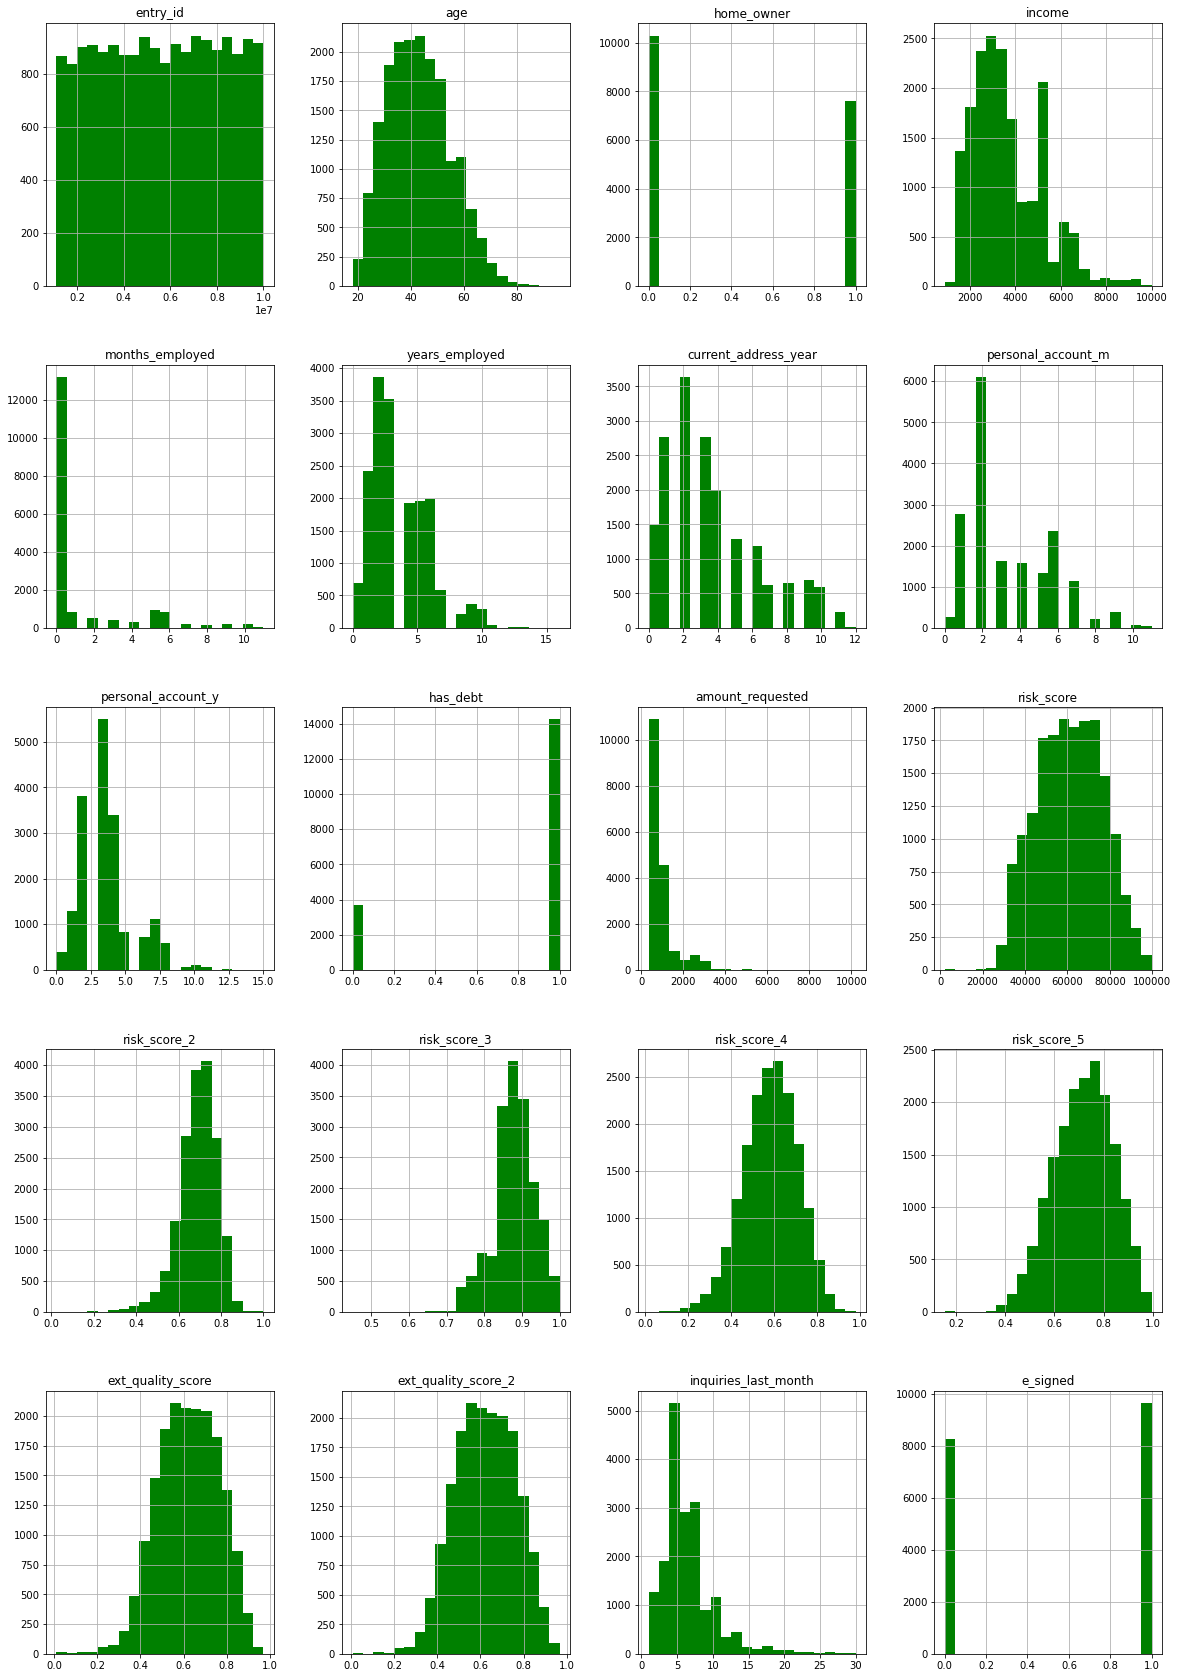

In [17]:
df.iloc[:, 0:-2].hist(bins = 20, figsize = (20,30), color = "g",)
plt.show()

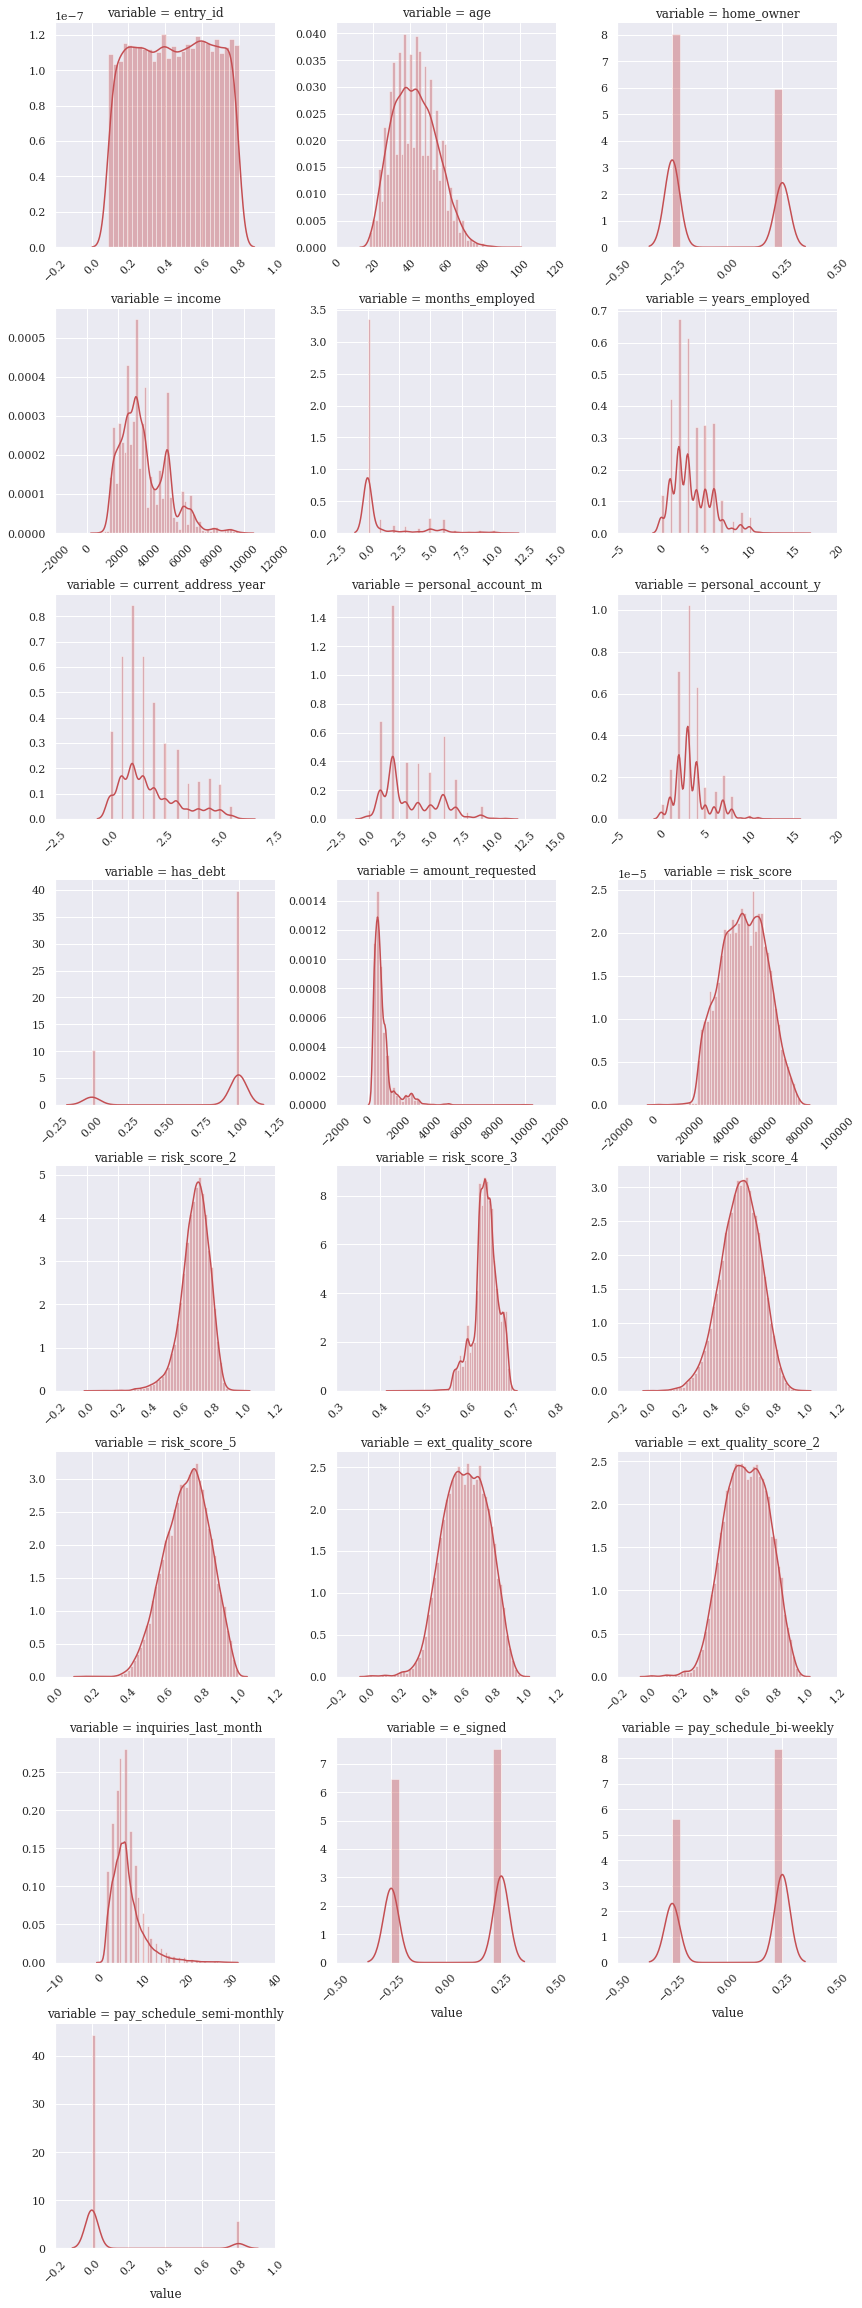

In [18]:
# Distribution plots for our continuous variables
# unpivot DataFrame into long-form
con_1 = pd.melt(df, id_vars=None, value_vars=None, var_name=None, value_name='value', col_level=None, ignore_index=True)

# Seaborn customizations
sns.set_theme(style="darkgrid", font='serif', context='notebook')

# initializing our FacetGrid object and using map to create subplots
g = sns.FacetGrid(con_1, col='variable', col_wrap=3, sharex=False, sharey=False, height=4)
g = g.map(sns.distplot, 'value', color='r')

# Matplotlib customization
g.set_xticklabels(rotation=45)
plt.show()

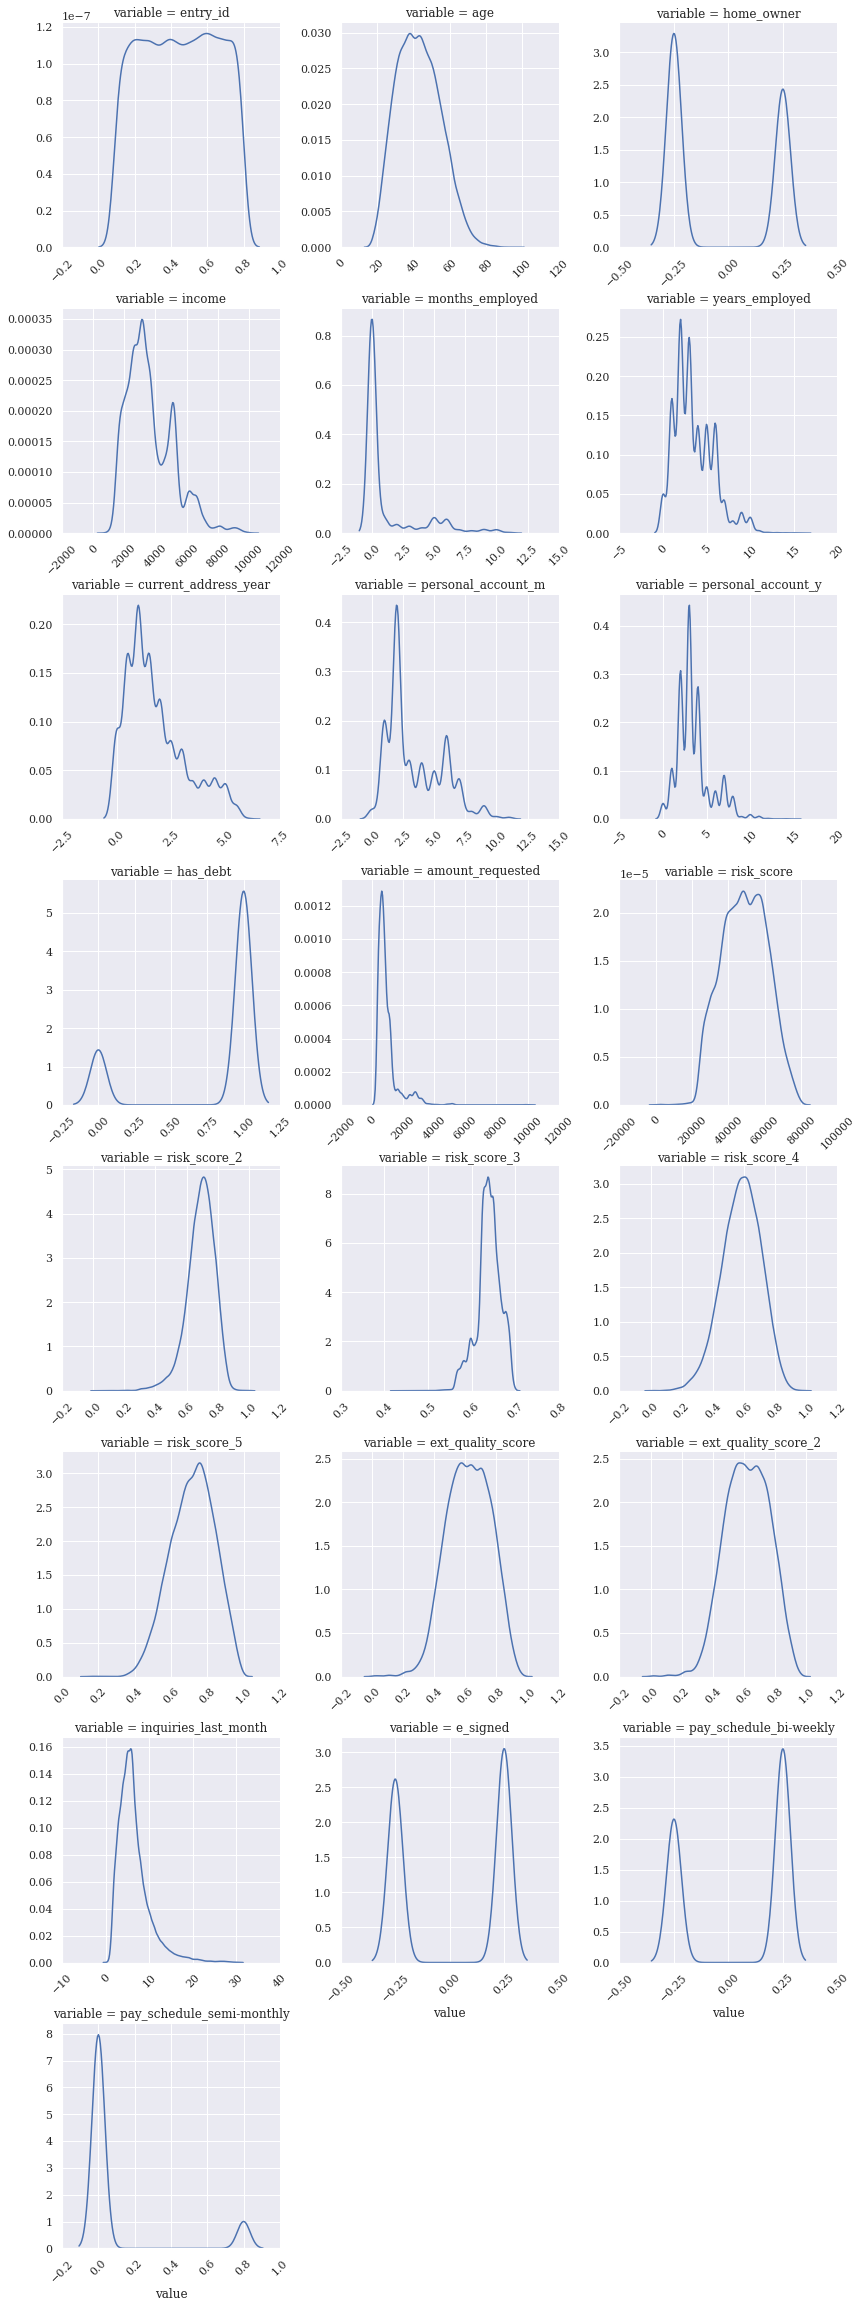

In [19]:
# Distribution plots for our continuous variables
# unpivot DataFrame into long-form
con_1 = pd.melt(df, id_vars=None, value_vars=None, var_name=None, value_name='value', col_level=None, ignore_index=True)

# Seaborn customizations
sns.set_theme(style="darkgrid", font='serif', context='notebook')

# initializing our FacetGrid object and using map to create subplots
g = sns.FacetGrid(con_1, col='variable', col_wrap=3, sharex=False, sharey=False, height=4)
g = g.map(sns.kdeplot, 'value', color='b')

# Matplotlib customization
g.set_xticklabels(rotation=45)
plt.show()

# C Veri Ön Işleme Part 3

In [20]:
df["personal_account_months"] = df["personal_account_m"] + df["personal_account_y"]*12

In [21]:
df[["personal_account_y", "personal_account_m", "personal_account_months"]].head()

,personal_account_y,personal_account_m,personal_account_months
0,2,6,30
1,7,2,86
2,1,7,19
3,7,2,86
4,8,2,98


In [22]:
df.drop(columns = ["personal_account_m", "personal_account_months", "months_employed"], axis = 1, inplace = True)

In [23]:
response = df["e_signed"]
users = df["entry_id"]

In [24]:
df.drop(columns=["entry_id", "e_signed"], axis = 1, inplace = True)

# E Test ve Train Verisini Ayırma

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(df,
                                                   response,
                                                   test_size=0.33,
                                                   random_state=0)

# F Veriyi Ölçekleme

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
sc_X = StandardScaler()
X_train_sc = pd.DataFrame(sc_X.fit_transform(X_train), 
                          columns = X_train.columns.values, 
                         index = X_train.index.values)

X_test_sc = pd.DataFrame(sc_X.transform(X_test), 
                         columns = X_test.columns.values, 
                        index = X_test.index.values)

In [29]:
X_train_sc.head()

,age,home_owner,income,years_employed,current_address_year,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,pay_schedule_bi-weekly,pay_schedule_semi-monthly
3064,-1.265290,-0.855753,1.087495,-0.682563,-0.209839,-0.773711,0.507205,-0.356338,-0.622850,-0.319594,-0.723796,1.820142,0.782909,0.519616,1.236447,0.426682,-1.228197,-0.355622
12440,-0.844954,1.168562,-0.263948,0.203016,0.880369,-0.257617,0.507205,-0.643539,-1.453234,0.088322,-0.891110,-0.091140,-0.074468,-0.764741,-1.471439,0.970771,-1.228197,2.811975
17704,-0.340550,1.168562,-0.401099,-1.125352,1.970577,-0.773711,0.507205,-0.069137,-0.593656,0.553309,-1.074701,-0.180446,-1.485460,0.683947,-1.453198,-0.389451,0.814202,-0.355622
3617,-1.181222,-0.855753,-0.063239,-0.682563,0.153563,0.258477,0.507205,-0.356338,0.382694,0.624982,1.024958,-0.397476,-0.339090,0.940926,0.229911,0.970771,0.814202,-0.355622
17503,1.424862,1.168562,1.950544,1.088594,2.697383,0.258477,0.507205,1.366869,1.975345,-0.750469,-1.549648,-1.622835,-1.577801,-3.017965,-3.005570,-0.389451,0.814202,-0.355622


# G Model Seçimi ve Eğitim(Training)

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score 

## Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
lr = LogisticRegression(penalty='l2', random_state=0)
lr.fit(X_train_sc, y_train)

LogisticRegression(random_state=0)

In [33]:
y_pred_lr = lr.predict(X_test_sc)

In [34]:
print(accuracy_score(y_test, y_pred_lr))
print()
print(precision_score(y_test, y_pred_lr))
print()
print(recall_score(y_test, y_pred_lr))
print()
print(f1_score(y_test, y_pred_lr))
print()
print(confusion_matrix(y_test, y_pred_lr))

0.5642978003384095

0.5745870393900889

0.7150537634408602

0.6371706354797803

[[1074 1674]
 [ 901 2261]]


## SVM

In [35]:
from sklearn.svm import SVC

In [36]:
svm = SVC(random_state=0, kernel="rbf")
svm.fit(X_train_sc, y_train)

SVC(random_state=0)

In [37]:
y_pred_svm = svm.predict(X_test_sc)

In [38]:
print(accuracy_score(y_test, y_pred_svm))
print()
print(precision_score(y_test, y_pred_svm))
print()
print(recall_score(y_test, y_pred_svm))
print()
print(f1_score(y_test, y_pred_svm))
print()
print(confusion_matrix(y_test, y_pred_svm))

0.6071065989847716

0.6142546245919478

0.7141049968374447

0.6604270254460369

[[1330 1418]
 [ 904 2258]]


## Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
rf = RandomForestClassifier(random_state = 0,
                           n_estimators = 100,
                           criterion = "entropy")
rf.fit(X_train_sc, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [41]:
y_pred_rf = rf.predict(X_test_sc)

In [42]:
print(accuracy_score(y_test, y_pred_rf))
print()
print(precision_score(y_test, y_pred_rf))
print()
print(recall_score(y_test, y_pred_rf))
print()
print(f1_score(y_test, y_pred_rf))
print()
print(confusion_matrix(y_test, y_pred_rf))

0.6196277495769882

0.6330034924330618

0.6878557874762808

0.6592906941497424

[[1487 1261]
 [ 987 2175]]


# H Eğitilmiş Modellerin Değerlendirilmesi

In [43]:
from sklearn.model_selection import cross_val_score

In [44]:
cv_result = []
best_estimator = []
estimator = [lr, svm, rf]

for i in range(len(estimator)):
    accuracies = cross_val_score(estimator = estimator[i], X=X_train_sc, y=y_train, cv=5, n_jobs=-1, verbose=True)
    cv_result.append(accuracies.mean())
    best_estimator.append(estimator[i])

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   21.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   12.9s finished


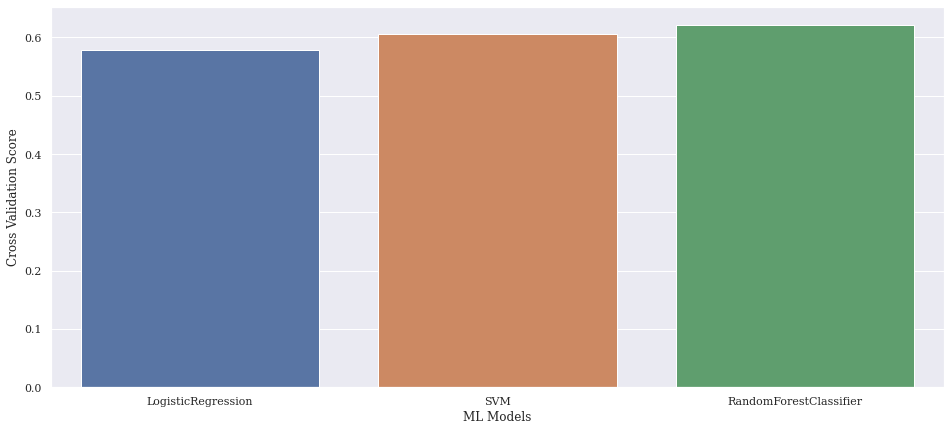

In [45]:
result = pd.DataFrame({"Cross Validation Score" : cv_result, "ML Models" : ["LogisticRegression","SVM","RandomForestClassifier"]})
plt.figure(figsize=(16,7))
sns.barplot(y = "Cross Validation Score", x ="ML Models", data= result)
plt.show()

In [46]:
result

,Cross Validation Score,ML Models
0,0.578014,LogisticRegression
1,0.606770,SVM
2,0.621604,RandomForestClassifier


# I Hyperparameter Optimizasyonu

## Part 1

In [51]:
parameters={"max_depth": [2, 3, None],
           "max_features" : [1, 3, 5, 7, 10],
           "min_samples_split" : [2, 3, 5, 10, 11],
           "min_samples_leaf" : [3, 5, 10],
           "bootstrap" : [True, False],
           "criterion" : ["entropy", "gini"]}

In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:
grid_search = GridSearchCV(estimator = rf,
                          param_grid = parameters,
                          scoring = "accuracy",
                          cv = 3,
                          n_jobs = -1,
                          verbose = 3)

In [54]:
grid_search.fit(X_train_sc, y_train)

Fitting 3 folds for each of 900 candidates, totalling 2700 fits


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(criterion='entropy',
                                              random_state=0),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 3, None],
                         'max_features': [1, 3, 5, 7, 10],
                         'min_samples_leaf': [3, 5, 10],
                         'min_samples_split': [2, 3, 5, 10, 11]},
             scoring='accuracy', verbose=3)

In [55]:
rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_

In [56]:
print(rf_best_accuracy)

0.6273549220638494


In [57]:
print(rf_best_parameters)

{'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 10, 'min_samples_leaf': 3, 'min_samples_split': 11}


## Part 2

In [59]:
parameters_2={"max_depth": [None],
           "max_features" : [9, 10, 11],
           "min_samples_split" : [11,12,13],
           "min_samples_leaf" : [2, 3, 4],
           "bootstrap" : [True],
           "criterion" : ["entropy"]}

In [60]:
grid_search_2 = GridSearchCV(estimator = rf,
                          param_grid = parameters_2,
                          scoring = "accuracy",
                          cv = 5,
                          n_jobs = -1,
                          verbose = 1)

In [61]:
grid_search_2.fit(X_train_sc, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(criterion='entropy',
                                              random_state=0),
             n_jobs=-1,
             param_grid={'bootstrap': [True], 'criterion': ['entropy'],
                         'max_depth': [None], 'max_features': [9, 10, 11],
                         'min_samples_leaf': [2, 3, 4],
                         'min_samples_split': [11, 12, 13]},
             scoring='accuracy', verbose=1)

In [62]:
rf_best_accuracy = grid_search_2.best_score_
rf_best_parameters = grid_search_2.best_params_

In [63]:
print(rf_best_accuracy)

0.631356120605808


In [64]:
print(rf_best_parameters)

{'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 11, 'min_samples_leaf': 2, 'min_samples_split': 13}


## Part 3

In [66]:
parameters_3={"max_depth": [None],
           "max_features" : [11, 12, 13, 14],
           "min_samples_split" : [13, 14, 15, 16],
           "min_samples_leaf" : [2],
           "bootstrap" : [True],
           "criterion" : ["entropy"]}

In [67]:
grid_search_3 = GridSearchCV(estimator = rf,
                          param_grid = parameters_3,
                          scoring = "accuracy",
                          cv = 5,
                          n_jobs = -1,
                          verbose = 1)

In [68]:
grid_search_3.fit(X_train_sc, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(criterion='entropy',
                                              random_state=0),
             n_jobs=-1,
             param_grid={'bootstrap': [True], 'criterion': ['entropy'],
                         'max_depth': [None], 'max_features': [11, 12, 13, 14],
                         'min_samples_leaf': [2],
                         'min_samples_split': [13, 14, 15, 16]},
             scoring='accuracy', verbose=1)

In [70]:
rf_best_accuracy = grid_search_3.best_score_
rf_best_parameters = grid_search_3.best_params_

In [71]:
print(rf_best_accuracy)

0.631356120605808


In [72]:
print(rf_best_parameters)

{'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 11, 'min_samples_leaf': 2, 'min_samples_split': 13}


# J Tahminleme(Prediction)

In [74]:
y_pred = grid_search_3.predict(X_test_sc)

In [75]:
y_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [80]:
confusion_matrix(y_test, y_pred)

array([[1477, 1271],
       [ 934, 2228]])

In [86]:
precision_score(y_pred, y_test)

0.704617330803289

In [87]:
f1_score(y_pred,y_test)

0.6689686233298303

In [88]:
recall_score(y_pred,y_test)

0.6367533581023149

<AxesSubplot:>

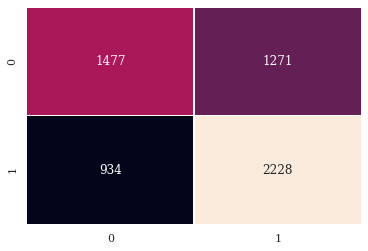

In [84]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, cbar = False, fmt="0.0f", linecolor="w", linewidths=0.5)

# K Sonuç

In [76]:
final_result = pd.concat([users, y_test], axis = 1).dropna()

In [77]:
final_result["predictions"] = y_pred

In [78]:
final_result

,entry_id,e_signed,predictions
5,8492423,1.0,0
7,4297036,1.0,0
8,6493191,1.0,1
9,8908605,1.0,1
12,6889184,1.0,1
...,...,...,...
17897,4078915,1.0,1
17898,2150976,0.0,0
17899,6799343,1.0,0
17901,1807355,0.0,0
